In [ ]:
!pip install pandas numpy matplotlib
!pip install seaborn scikit-learn joblib

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib





In [6]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

Saving vw_churn_data_for_prediction.csv to vw_churn_data_for_prediction.csv


In [7]:
# The uploaded file is named "vw_churn_data_for_prediction.csv"
data = pd.read_csv('vw_churn_data_for_prediction.csv')

# Display the first few rows of the fetched data
print(data.head())

  Customer_ID  Gender  Age Married          State  Number_of_Referrals  \
0   42012-COL  Female   49      No       Colorado                    8   
1   79321-MAS  Female   22     Yes  Massachusetts                    4   
2   82811-RHO  Female   46     Yes   Rhode Island                    2   
3   36568-NEW    Male   26     Yes     New Mexico                    7   
4   62683-ALA  Female   30      No         Alaska                   12   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 2        NaN           Yes             No  ...   
1                 8     Deal 3           Yes             No  ...   
2                18     Deal 2           Yes             No  ...   
3                 8        NaN           Yes            Yes  ...   
4                20        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      19.700001   1396.900024      0.000000   
1      Credit Ca

In [8]:
# Data processing
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

# Collecting list of columns to be label encoded (conerting category to numerical values)
columns_to_encode = ['Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service',
                     'Multiple_Lines','Internet_Service', 'Internet_Type', 'Online_Security',
                     'Online_Backup','Device_Protection_Plan', 'Premium_Support', 'Streaming_TV',
                     'Streaming_Movies','Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
                     'Payment_Method']

# Encoding categorical variables but not target variable and i.e Customer_Status.

label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

# Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Training Random Forest Model
# Initializing the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Confusion Matrix:
[[801  52]
 [122 227]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       853
           1       0.81      0.65      0.72       349

    accuracy                           0.86      1202
   macro avg       0.84      0.79      0.81      1202
weighted avg       0.85      0.86      0.85      1202



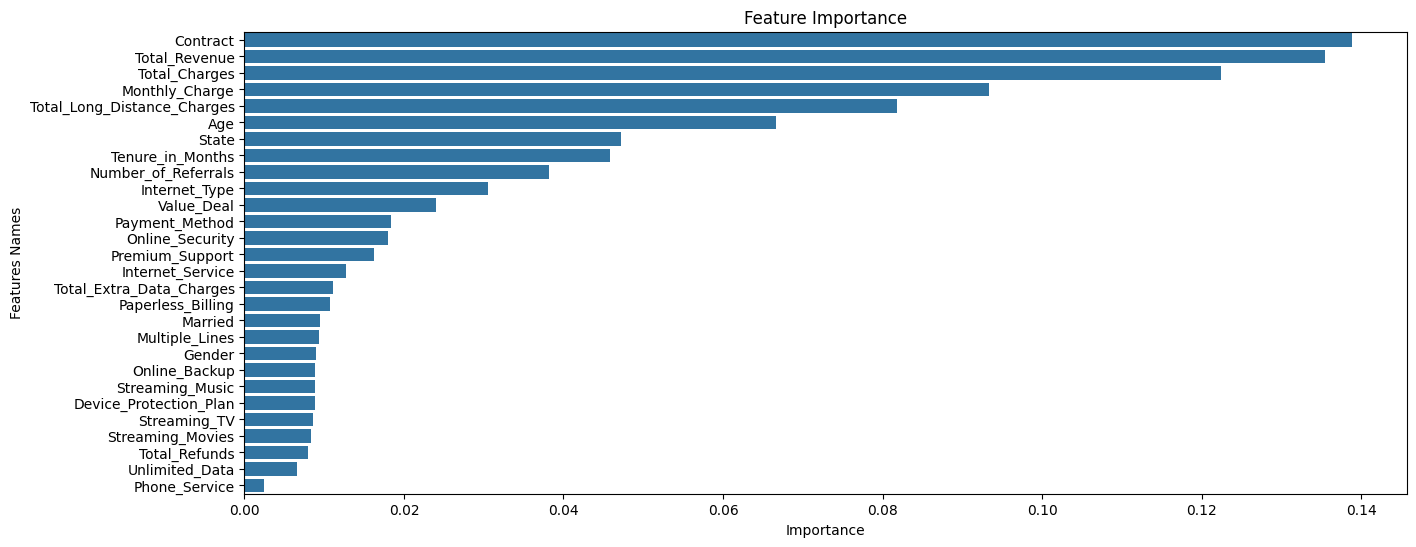

In [10]:
# Evaluate Model
# Make predictions
y_pred = rf_model.predict(X_test)

# Confustion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Feature Selection
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importance
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.xlabel('Importance')
plt.ylabel('Features Names')
plt.title('Feature Importance')
plt.show()

In [11]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

Saving vw_JoinData_for_prediction.csv to vw_JoinData_for_prediction.csv


In [13]:
# Reading csv data using pandas dataframe
df_data = pd.read_csv('vw_JoinData_for_prediction.csv')

# Displaying fetched data
print(df_data.head())

# Copying the original Dataframe to prevent from getting encoded columns(0 and 1)
original_df = df_data.copy()

# Preserving Customer_ID in New data
customer_ids = df_data['Customer_ID']

# Dropping unnecessary columns for prediction
df_data = df_data.drop(['Customer_ID', 'Churn_Category','Customer_Status','Churn_Reason'], axis=1)

# Encoding catergorical variables
for column in df_data.select_dtypes(include=['object']).columns:
    df_data[column] = label_encoders[column].transform(df_data[column])

# Predictions
new_predictions = rf_model.predict(df_data)

# Adding Predictions to the original Dataframe
original_df['Customer_Status_Predicted'] = new_predictions

# Filtering the dataframe to include only records predicted as "Churned"
original_df = original_df[original_df['Customer_Status_Predicted'] == 1]

# Saving the results and downloading file
original_df.to_csv('predicted_churned_customers.csv', index=False)
files.download('predicted_churned_customers.csv')







  Customer_ID  Gender  Age Married          State  Number_of_Referrals  \
0   72357-WAS  Female   53      No     Washington                   14   
1   82129-ILL  Female   26      No       Illinois                    9   
2   24754-NEB  Female   63     Yes       Nebraska                    0   
3   62497-MAS  Female   20      No  Massachusetts                    0   
4   62535-KAN    Male   42      No         Kansas                    8   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                12     Deal 5           Yes             No  ...   
1                 8     Deal 5           Yes             No  ...   
2                28        NaN           Yes             No  ...   
3                 2     Deal 5           Yes             No  ...   
4                22     Deal 5           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0      Credit Card      44.299999     44.299999      0.000000   
1      Credit Ca

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>